# Visualisations

- [Notebook Preparations](#notebook-preparations)

- [Visualisations](#visualisations)
    - Man-Kendall Test Results
        - Month
        - Month & Elevation
        - Country

## Notebook Preparations

In [18]:
# Import Packages

import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
import plotly.express as px
import geopandas as gpd
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import pymannkendall as mk
from pathlib import Path
from scipy.stats import norm


In [28]:
# Directories

NB_DIR = Path.cwd()         # Notebook Directory
REPO_ROOT = NB_DIR.parent   # Main Directory

# Files

# Macro-perspective Trends
avg_country = pd.read_csv(REPO_ROOT / 'Data/Cleaned/Tests/avg_country_trends.csv',index_col=False)                  # Average Snowpack Depth Trend Per Country
avg_country_month = pd.read_csv(REPO_ROOT / 'Data/Cleaned/Tests/avg_country_month_trends.csv',index_col=False)      # Average Snowpack Depth Trend Per Country Month
avg_month = pd.read_csv(REPO_ROOT / 'Data/Cleaned/Tests/avg_month_trends.csv',index_col=False)                      # Average Snowpack Depth Trend per Month
avg_elevation_month = pd.read_csv(REPO_ROOT / 'Data/Cleaned/Tests/avg_elevation_month_trends.csv',index_col=False)  # Average Snowpack Depth Trend Per Elevation Bad Mong

# Micro-persective Trends
typical_country = pd.read_csv(REPO_ROOT / 'Data/Cleaned/Tests/station-month-time-series-by-country.csv',index_col=False)                # Typical Snowpack Depth Trend of Weather Station Per Country 
typical_country_month = pd.read_csv(REPO_ROOT / 'Data/Cleaned/Tests/station-month-time-series-by-country-month.csv',index_col=False )    # Typical Snowpack Depth Trend of Weather Station Per Country Month
typical_station_month = pd.read_csv(REPO_ROOT / 'Data/Cleaned/Tests/station-month-time-series.csv',index_col=False)                     # Typical Snowpack Depth Trend of Weather Station Per Month
per_station = pd.read_csv(REPO_ROOT / 'Data/Cleaned/Tests/per_station_series.csv',index_col=False)                                      # Annual Snowpack Depth Trend per Weather Station



In [119]:
# Custom functions

# Assign text labels for country months

month_labels = {
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    11:'Nov',
    12:'Dec'
}

# Custom Function
def get_month_name(month_number):
    """
    Converts a month number to an abbreviated month name using a custom dictionary

    Args:
        month_number (int): The number representing the month (1 for January, 12 for December).

    Returns:
        str: The abbreviated name of the month, or "Invalid month number" if out of range.
    """
    if 1 <= month_number <= 12:
        return month_labels[month_number]
    else:
        return "Invalid month number"


# avg_country_month DF
avg_country_month['month_name'] = avg_country_month['month'].apply(get_month_name)

# avg_month DF
avg_month['month_name'] = avg_month['month'].apply(get_month_name)

# avg_elevation_month DF
avg_elevation_month['month_name'] = avg_elevation_month['month'].apply(get_month_name)



country_abr = {
    'Italy':'IT',
    'Austria':'AT',
    'France':'FR',
    'Germany':'DE',
    'Switzerland':'CH',
    'Slovenia':'SI'
}

# Custom Function
def get_country_abr(country_name):
    """
    Converts a country's name to an abbreviated name using a custom dictionary

    Args:
        country_name: The country's full name

    Returns:
        str: The abbreviated name of the country, or "No Abrev Present" if no answer within custom dictionary
    """
    if country_name in country_abr:
        return country_abr[country_name]
    else:
        return "No Abrev Present"
    

avg_country['country_abr'] = avg_country['country'].apply(get_country_abr)
avg_country_month['country_abr'] = avg_country_month['country'].apply(get_country_abr)

typical_country['country_abr'] = typical_country['country'].apply(get_country_abr)
typical_country_month['country_abr'] = typical_country_month['country'].apply(get_country_abr)



## Visualisations

Visualisations of Statistical Trends for Average Snowpack Depths

### Macro-Perspectives

Average Snowpack Trends for regional districts

#### Country Trends

In [124]:
per_station

,country,station_id,n_months,median_slope_theil_per_year,median_slope_theil_per_decade,mean_slope_theil_per_year,mean_slope_theil_per_decade,p_combined
0,Austria,13,6,0.104423,1.044226,0.229252,2.292520,0.452272
1,Austria,20,6,0.000000,0.000000,0.015931,0.159314,0.807434
2,Austria,31,6,0.000000,0.000000,0.050926,0.509259,0.507123
3,Austria,43,7,-0.166667,-1.666667,-0.232876,-2.328764,0.064821
4,Austria,50,7,-0.052632,-0.526316,-0.117846,-1.178459,0.185393
...,...,...,...,...,...,...,...,...
790,Switzerland,2929,7,0.000000,0.000000,0.041666,0.416659,0.620208
791,Switzerland,2937,7,-0.102564,-1.025641,-0.127932,-1.279321,0.013715
792,Switzerland,2941,7,-0.274295,-2.742947,-0.262335,-2.623348,0.005337
793,Switzerland,2967,7,0.000000,0.000000,0.024508,0.245078,0.932954


In [125]:
avg_country

,country,n_years,median_stations_per_year,trend,p,tau,slope_per_year,slope_per_decade,variant,country_abr
0,Austria,47,366,decreasing,0.014395,-0.180389,-0.213336,-2.133362,hamed_rao,AT
1,France,61,54,no trend,0.513495,0.057923,0.088097,0.880971,hamed_rao,FR
2,Germany,72,152,no trend,0.282672,-0.086854,-0.098483,-0.984831,hamed_rao,DE
3,Italy,47,93,decreasing,0.018893,-0.237743,-0.400024,-4.000241,hamed_rao,IT
4,Slovenia,59,48,decreasing,0.004355,-0.255406,-0.245027,-2.450269,hamed_rao,SI
5,Switzerland,84,159,no trend,0.087017,-0.127367,-0.108081,-1.080809,hamed_rao,CH


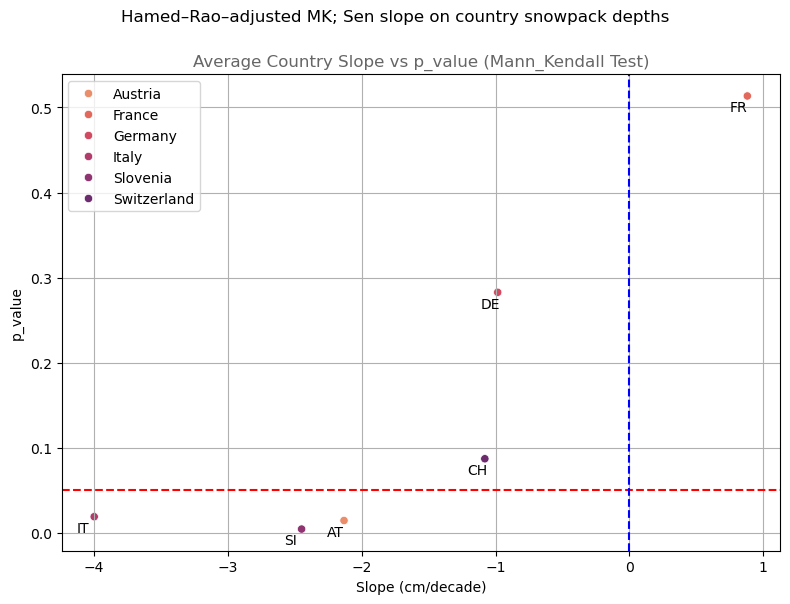

In [148]:
fig1, ax = plt.subplots(figsize=(8,6))
fig1.suptitle('Hamed–Rao–adjusted MK; Sen slope on country snowpack depths',
             y=1, fontsize=12, color='0')

# Average Country Trends
sns.scatterplot(data=avg_country, x='slope_per_decade',y='p',hue='country',palette='flare',legend=True , ax=ax)

ax.legend()
ax.set_ylabel('p_value')
ax.set_xlabel('Slope (cm/decade)')
ax.set_title('Average Country Slope vs p_value (Mann_Kendall Test)', y=1, color='0.4')
ax.grid(True)

# Annotate each point with the country name
for i, row in avg_country.iterrows():
    ax.text(
        row['slope_per_decade'] - 0.13,  # x position slightly offset
        row['p'] - 0.018,                # y position slightly offset
        row['country_abr'],
        fontsize=10,style='normal'
    )

plt.axhline(0.05,linestyle='--',color='red',label='p_value = 0.05 (Significance Threshold)')
plt.axvline(0.00,linestyle='--',color='blue',label='Zero Slope')

plt.tight_layout()
plt.show()

In [151]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- inputs you already have ---
# per_station_avg: one row per station (or station_id), with columns:
#   ['country','median_slope_theil_per_decade','p_combined', ...]
# country_macro: one row per country, with columns:
#   ['country','slope_per_decade','p', 'country_abr']  # country_abr = "AT","CH",...

countries = sorted(per_station['country'].unique())

fig = make_subplots(
    rows=1, cols=2, column_widths=[0.65, 0.35], shared_yaxes=True,
    subplot_titles=("Stations (Theil–Sen slope per decade)", "Country averages")
)

# One legend item per country; traces that share legendgroup toggle together
for c in countries:
    psc = per_station[per_station['country'] == c]
    avg = avg_country[avg_country['country'] == c]

    # Left panel: station points
    fig.add_trace(
        go.Scatter(
            x=psc['median_slope_theil_per_decade'],
            y=psc['p_combined'],
            mode="markers",
            name=c,
            legendgroup=c,
            marker=dict(size=6, opacity=0.55),
            hovertemplate=(
                "<b>%{text}</b><br>"
                "Slope: %{x:.2f} cm/decade<br>"
                "p: %{y:.3f}<extra></extra>"
            ),
            text=psc['country'],
            showlegend=True,     # legend item shown here
        ),
        row=1, col=1
    )

    # Right panel: country average point (bigger marker + label)
    fig.add_trace(
        go.Scatter(
            x=avg['slope_per_decade'],
            y=avg['p'],
            mode="markers+text",
            text=avg['country_abr'],
            textposition="top center",
            marker=dict(size=12, line=dict(width=1.5, color="black")),
            name=c,
            legendgroup=c,
            showlegend=False,    # use the same legend item as the left trace
            hovertemplate=(
                "<b>%{text}</b><br>"
                "Avg slope: %{x:.2f} cm/decade<br>"
                "p: %{y:.3f}<extra></extra>"
            ),
        ),
        row=1, col=2
    )

# Guides: p=0.05 and zero slope on both subplots
for col in (1, 2):
    fig.add_hline(y=0.05, line_dash="dash", line_color="red", row=1, col=col)
    fig.add_vline(x=0.0, line_dash="dash", line_color="blue", row=1, col=col)

# Nice defaults
fig.update_layout(
    title="Hamed–Rao–adjusted MK; Theil–Sen slopes of mean snowpack depths",
    legend_title="Toggle countries",
    legend=dict(groupclick="togglegroup"),   # one click toggles both traces for a country
    margin=dict(l=60, r=20, t=60, b=60),
)

fig.update_xaxes(title_text="Slope (cm/decade)", row=1, col=1)
fig.update_xaxes(title_text="Slope (cm/decade)", row=1, col=2)
fig.update_yaxes(title_text="p-value (two-sided)")

fig.show()


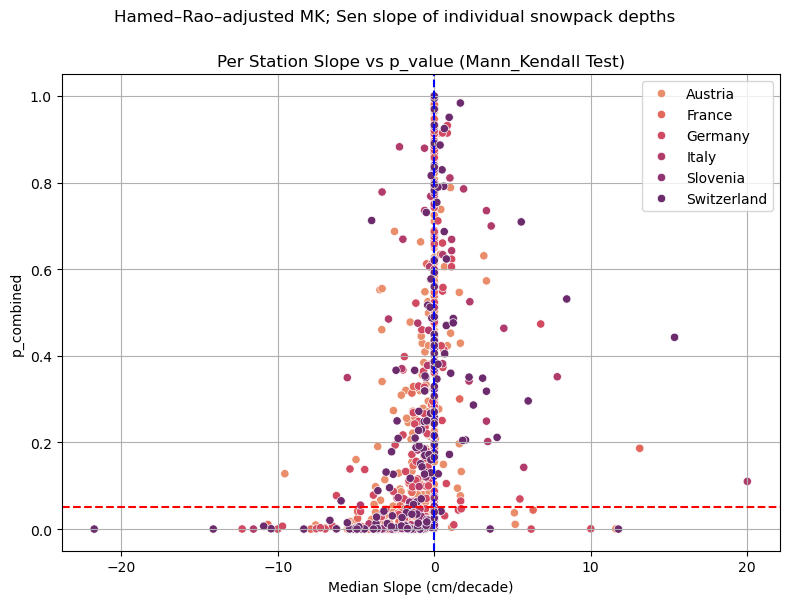

In [ ]:
fig2, ax = plt.subplots(figsize=(8,6))
fig2.suptitle('Hamed–Rao–adjusted MK; Sen slope of individual snowpack depths',
             y=1, fontsize=12, color='0')

# Typical Country Trends
sns.scatterplot(data=per_station, x='median_slope_theil_per_decade',y='p_combined',hue='country',palette='flare',legend=True, ax=ax )

ax.legend()
ax.set_ylabel('p_combined')
ax.set_xlabel('Median Slope (cm/decade)')
ax.set_title('Per Station Slope vs p_value (Mann_Kendall Test)', y=1)
ax.grid(True)


 
plt.axhline(0.05,linestyle='--',color='red',label='p_value = 0.05 (Significance Threshold)')
plt.axvline(0.00,linestyle='--',color='blue',label='Zero Slope')

plt.tight_layout()
plt.show()

##### Interpretation

Countries Italy, Slovenia, and Austria exhibit statistically significant decreases in country-level mean snowpack depth, with Sen slopes of roughly −2 to −4 cm per decade. Germany and Switzerland show negative but non-significant trends (about −1 cm/decade), meaning the decreases are not distinguishable from zero at 𝛼 = 0.05. France shows a non-significant slight increase. Results are from Mann–Kendall (Hamed–Rao) tests applied to country-year average snowpack series; slopes are reported in cm per decade.

#### Average Country Month Trend

In [101]:
df = avg_country_month.copy()   # your dataframe used to plot
df['is_sig'] = df['p'] < 0.05
df['is_neg'] = df['slope_per_decade'] < 0

overall = {
    "n_total": len(df),
    "n_sig": int(df['is_sig'].sum()),
    "pct_sig": 100*df['is_sig'].mean(),
    "n_sig_neg": int((df['is_sig'] & df['is_neg']).sum()),
    "n_sig_pos": int((df['is_sig'] & ~df['is_neg']).sum()),
}
overall

{'n_total': 42,
 'n_sig': 9,
 'pct_sig': np.float64(21.428571428571427),
 'n_sig_neg': 9,
 'n_sig_pos': 0}

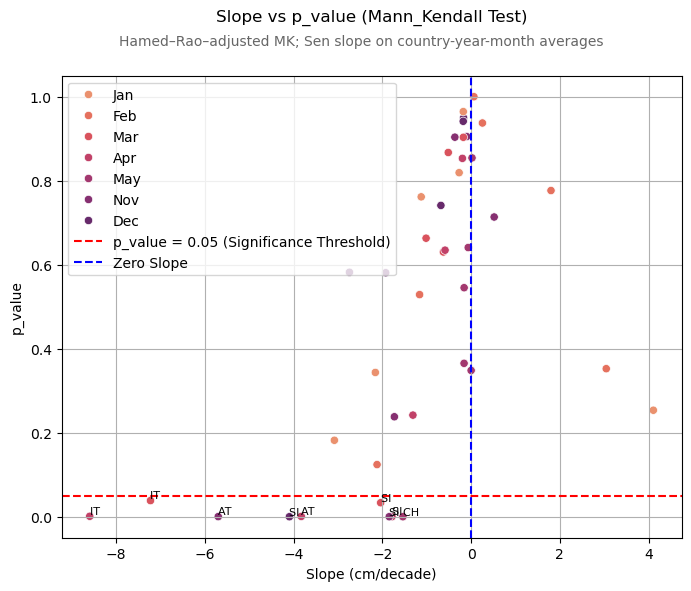

In [115]:

fig, ax = plt.subplots(figsize=(8,6))


sns.scatterplot(data=avg_country_month, x='slope_per_decade',y='p',hue='month_name',palette='flare',legend=True )

plt.axhline(0.05,linestyle='--',color='red',label='p_value = 0.05 (Significance Threshold)')
plt.axvline(0.00,linestyle='--',color='blue',label='Zero Slope')

# # Annotate each point with the month name
# for i, row in avg_country_month.iterrows():

#       ax.text(
#         row['slope_per_decade'] + 0.02,  # x position slightly offset
#         row['p'] + 0.005,                # y position slightly offset
#         row['month_name'],
#         fontsize=9
#     )


ax.legend()
ax.set_ylabel('p_value')
ax.set_xlabel('Slope (cm/decade)')
ax.set_title('Slope vs p_value (Mann_Kendall Test)',y=1.1)
ax.grid(True)


fig.suptitle('Hamed–Rao–adjusted MK; Sen slope on country-year-month averages',
             y=0.95, fontsize=10, color='0.4')


df = avg_country_month.copy()   # your dataframe used to plot
for _, r in df[df['p'] < 0.05].iterrows():
    ax.text(r['slope_per_decade'], r['p'],
            f"{r['country_abr']} ",
            fontsize=8, ha='left', va='bottom')

plt.show()

In [96]:
by_month = (df.groupby('month')
            .agg(n=('is_sig','size'),
                 n_sig=('is_sig','sum'),
                 pct_sig=('is_sig', lambda s: 100*s.mean()),
                 median_slope_decade=('slope_per_decade','median'))
            .reset_index()
            .sort_values('pct_sig', ascending=False))
by_month

,month,n,n_sig,pct_sig,median_slope_decade
3,4,6,3,50.000000,-1.547193
2,3,6,2,33.333333,-0.820060
5,11,6,2,33.333333,-1.047841
4,5,6,1,16.666667,-0.111720
6,12,6,1,16.666667,-1.302947
0,1,6,0,0.000000,-0.697642
1,2,6,0,0.000000,0.158585


##### Interpretation

Country-months that exhibit statistically significant decreases in mean snowpack depth are all amongst fringe winter months; November, December, March, April, May. 

#### Average Month Trend

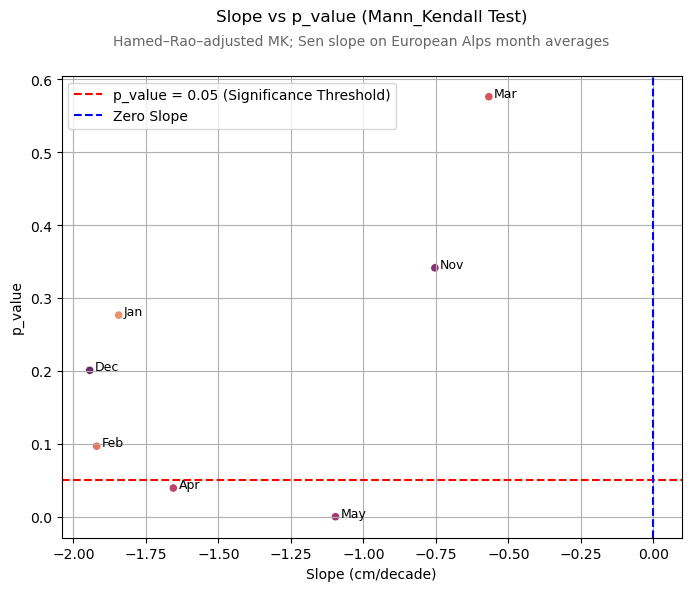

In [ ]:

fig, ax = plt.subplots(figsize=(8,6))


sns.scatterplot(data=avg_month, x='slope_per_decade',y='p',hue='month_name',palette='flare',legend=False )

plt.axhline(0.05,linestyle='--',color='red',label='p_value = 0.05 (Significance Threshold)')
plt.axvline(0.00,linestyle='--',color='blue',label='Zero Slope')

# Annotate each point with the month name
for i, row in avg_month.iterrows():

      ax.text(
        row['slope_per_decade'] + 0.018,  # x position slightly offset
        row['p'] + 0.00,                # y position slightly offset
        row['month_name'],
        fontsize=9
    )


ax.legend()
ax.set_ylabel('p_value')
ax.set_xlabel('Slope (cm/decade)')
ax.set_title('Slope vs p_value (Mann_Kendall Test)', y=1.1)
ax.grid(True)


fig.suptitle('Hamed–Rao–adjusted MK; Sen slope on European Alps month averages',
             y=0.95, fontsize=10, color='0.4')

plt.show()

##### Interpretation

Months April and May exhibit statistically significant decreases in European-Alps mean snowpack depth, with Sen slopes of roughly  -1.60 and -1.10 cm per decade respectively. All other winter months, February, December, January, November and March show negative but non-significant trends, with Sen Slopes of roughly -0.55 to -1.90 cm per decade.  These decreases ccannot be distinguished from zero trend due to insufficient evidence (α=0.05).

Further analysis can investiage changes in weather patterns of Springs months (April, May) to link correlation of decreasing Sen slopes of mean snowpack depths.


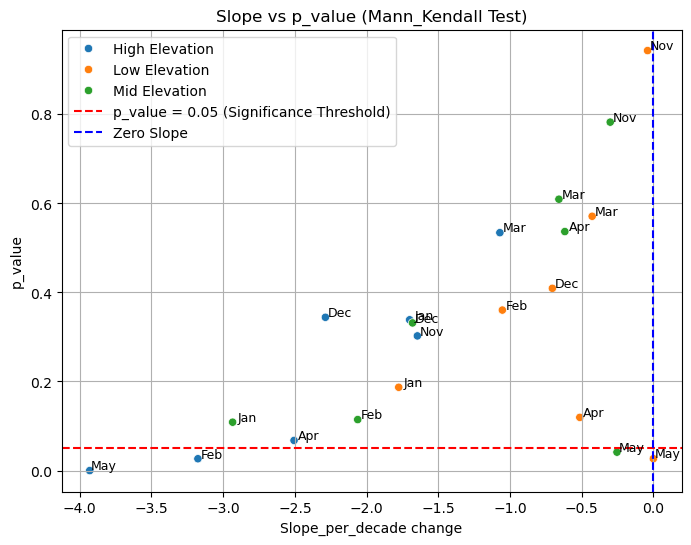

In [92]:
avg_elevation_month['month_name'] = avg_elevation_month['month'].apply(get_month_name)


fig2, ax2 = plt.subplots(figsize=(8,6))



sns.scatterplot(data=avg_elevation_month, x='slope_per_decade',y='p',hue='elevation_band', ax=ax2 )

plt.axhline(0.05,linestyle='--',color='red',label='p_value = 0.05 (Significance Threshold)')
plt.axvline(0.00,linestyle='--',color='blue',label='Zero Slope')

for i, row in avg_elevation_month.iterrows():
    ax2.text(
        row['slope_per_decade'] +0.1 ,
        row['p'] + 0.01,
        row['month_name'],        # Display month
        fontsize=9,
        ha='center',
        va='center',
        color='black',
        fontweight='normal'
    )


ax2.legend()
ax2.set_ylabel('p_value')
ax2.set_xlabel('Slope_per_decade change')
ax2.set_title('Slope vs p_value (Mann_Kendall Test)')
ax2.grid(True)

plt.show()

In [93]:
typical_country

,country,n_station_month_series,n_stations,median_years,percent_sig_station_month_series,median_station_slope_cm_per_year,median_station_slope_cm_per_decade,mean_station_slope_cm_per_year,mean_station_slope_cm_per_decade
0,Austria,2195,321,46.0,17.494305,-0.035714,-0.357143,-0.117927,-1.179269
1,France,300,46,50.0,10.000000,-0.133019,-1.330189,-0.174912,-1.749122
2,Germany,1103,159,53.0,14.868540,-0.026316,-0.263158,-0.107828,-1.078278
3,Italy,249,53,35.0,11.646586,0.000000,0.000000,-0.022740,-0.227403
4,Slovenia,366,53,56.0,33.333333,-0.087605,-0.876050,-0.144193,-1.441927
5,Switzerland,1096,163,59.0,12.956204,-0.040221,-0.402206,-0.126877,-1.268768
